# Analysing Theta Matrices
*Anastasia Nikiforova. HSE, Computational Linguistics*

*Thesis: Metaphor Identification using Topic Modeling*
____

In this notebook, finding out which topics prevail in MET and NONMET classes, and whether there is a difference at all.

As an example, we'll take LDA, ARTM-sparse and ARTM-dense 80/40 topic distributions in Metaphor corpus (Badryzlova, 2019).

In [1]:
import pandas as pd

In [38]:
# theta_df_1 = pd.read_csv('./artm/thetas/metcorp_tm_lda80.csv', index_col=None)
# theta_df_2 = pd.read_csv('./artm/thetas/metcorp_tm_sparse80.csv', index_col=None)
# theta_df_3 = pd.read_csv('./artm/thetas/metcorp_tm_dense80.csv', index_col=None)

theta_df_1 = pd.read_csv('./artm/thetas/metcorp_tm_lda40.csv', index_col=None)
theta_df_2 = pd.read_csv('./artm/thetas/metcorp_tm_sparse40.csv', index_col=None)
theta_df_3 = pd.read_csv('./artm/thetas/metcorp_tm_dense40.csv', index_col=None)

In [56]:
theta_df_1.head()

,Unnamed: 0,sents,targets,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39
0,0,нужно_PRED весь_ADJF время_NOUN бомбардировать...,1,0.002155,0.002220,0.003529,0.002120,0.002342,0.002089,0.002102,...,0.002093,0.002011,0.002155,0.002518,0.001852,0.001864,0.001913,0.002302,0.003006,0.002279
1,1,добрынин_NOUN говорить_VERB шевченко_NOUN цент...,1,0.025325,0.000967,0.001266,0.001371,0.000952,0.001201,0.094519,...,0.001370,0.001080,0.001069,0.002011,0.010275,0.033420,0.000900,0.014016,0.093960,0.000974
2,2,принять_INFN внимание_NOUN настойчиво_ADVB гру...,1,0.000380,0.000474,0.012164,0.000360,0.001321,0.000927,0.000465,...,0.001897,0.000829,0.000421,0.000422,0.000352,0.000353,0.000398,0.490057,0.313551,0.002572
3,3,кроме_PREP покупка_NOUN рука_NOUN сохранять_VE...,1,0.000761,0.000699,0.001562,0.000620,0.037552,0.001429,0.000719,...,0.001463,0.270538,0.000559,0.000635,0.000560,0.000657,0.000581,0.014130,0.152195,0.001185
4,4,сигнал_NOUN настойчиво_ADVB бомбардировать_INF...,1,0.001105,0.002289,0.076254,0.001119,0.288080,0.001415,0.011302,...,0.002991,0.001326,0.001095,0.001763,0.001007,0.001022,0.001453,0.002381,0.005116,0.005788


In [57]:
def get_topic_means(df):

    theta_df_met = df[df['targets']==1]
    theta_df_met_agg = theta_df_met.iloc[:,2:83].groupby(['targets'], as_index=False).agg(['mean']).values

    theta_df_nonmet = df[df['targets']==0]
    theta_df_nonmet_agg = theta_df_nonmet.iloc[:,2:83].groupby(['targets'], as_index=False).agg(['mean']).values
    
    return theta_df_met_agg, theta_df_nonmet_agg

In [60]:
theta_df_met_agg, theta_df_nonmet_agg = get_topic_means(theta_df_2)

In [61]:
import matplotlib.pyplot as plt

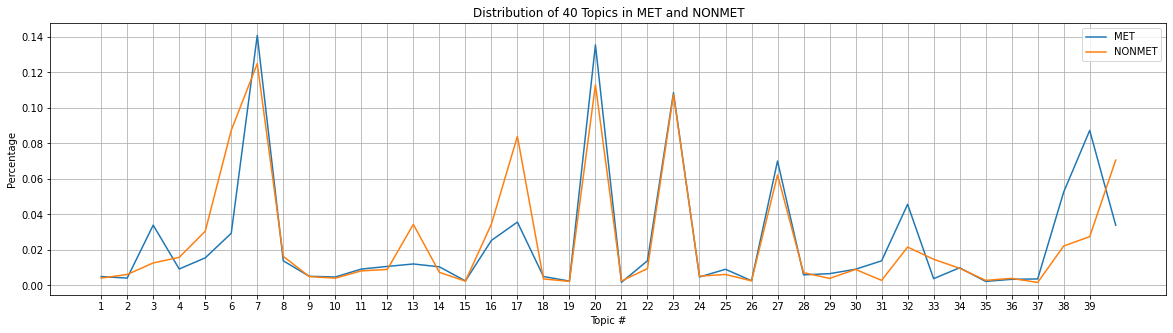

In [62]:
fig = plt.figure(figsize=(20,5))

plt.plot(theta_df_met_agg[0])
plt.plot(theta_df_nonmet_agg[0])

title = f"Distribution of {len(theta_df_met_agg[0])} Topics in MET and NONMET"
plt.title(title)
plt.xlabel('Topic #')
plt.ylabel('Percentage')

topics = [i for i in range(1, len(theta_df_met_agg[0]+1))]
plt.xticks(list(range(len(topics))), topics)

plt.legend(['MET', 'NONMET'], loc='best')
plt.grid()
plt.show()
# plt.savefig(f"topic_distribution_artms_{len(theta_df_met_agg[0])}.png")